<a href="https://colab.research.google.com/github/Heumpje/SSNOM-simulations/blob/main/Dipole_model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
# SOME PRELIMINARIES. Compile these first

#This function computes the effective polarizability of the point dipole model
def alphaeff(eps_p, eps_s, a, z):
    eps_0 = 1#8.8541878e-12
    alpha=(4 * eps_0 * np.pi * a**3)*(eps_p-1)/(eps_p+2)
    beta=(eps_s-1)/(eps_s+1)
    num=alpha*(1+beta)
    den=1-alpha*beta/(16.0*np.pi*(z+a)**3)
    return num/den

#Scattered field intensity
def compute_Isca(alphaeff):
    return (alphaeff)*np.conj(alphaeff)

#compute the Efield of the effective dipole along the surface direction
def compute_Edip(alphafac, R, pos, a):
    Edip=np.zeros(npnts)
    for i in range(R.size):
      if np.abs(R[i]-pos-a)>a:
        Edip[i] =(np.abs(alphafac)**2)/(4*np.pi*(np.abs(R[i]-pos-a))**3)
      else:
        Edip[i] =(np.abs(alphafac)**2)/(4*np.pi*(np.abs(a))**3)
    return Edip

#compute effective dielectric function for 2 materials next to each other
def compute_eps(x_values, eps_s1, eps_s2, a, pos):
    return (eps_s1*np.exp(-(x_values-pos)/a)+eps_s2)/(1+np.exp(-(x_values-pos)/a))

#plot graphs
def plot_result(x,y,xlab,ylab,title):
    plt.plot(x, y)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.grid(True)
#    plt.ylim(6.69e-13,6.7e-13)
    plt.show()

Exercise 1:
For a wavelength of 10 μm:
- What is the ratio I$_{Si}$/I$_{Au}$

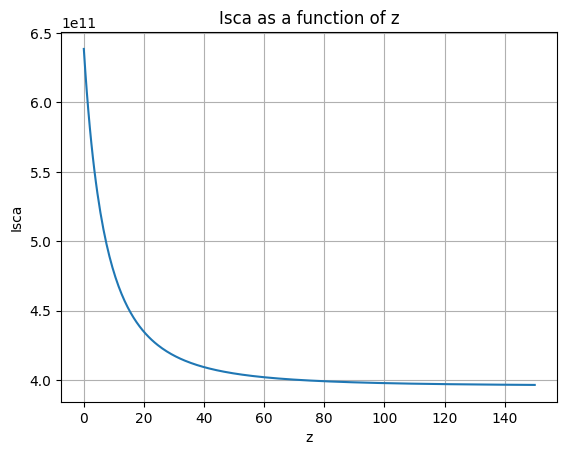

In [58]:
# Constants
wavelength = 10000  # Wavelength in nanometers (i.e. 10 um)
a = 30 # sphere radius in nanometers (i.e. 30 nm)
# Wavenumber k
k = 2 * np.pi / wavelength
# Complex Dielectric constant probe
eps_p = -1000.0+0.0j
# Complex Dielectric constant sample
eps_s = -4.2+1426j #Au
eps_s = 12.2+0j #Si
# maximum separation and number of points
zmax = 150 #in nm
npnts = 300

# Define range of z values (separation between probe and sample)
z_values = np.linspace(1e-16, zmax, npnts)

# Compute effective polarizability alpha for each z value
alpha_values = alphaeff(eps_p, eps_s, a, z_values)

# Compute absorption cross section Cabs for each alpha value
Isca_values = compute_Isca(alpha_values)
# Plot Cabs as a function of z
plot_result(z_values,Isca_values,'z','Isca','Isca as a function of z')

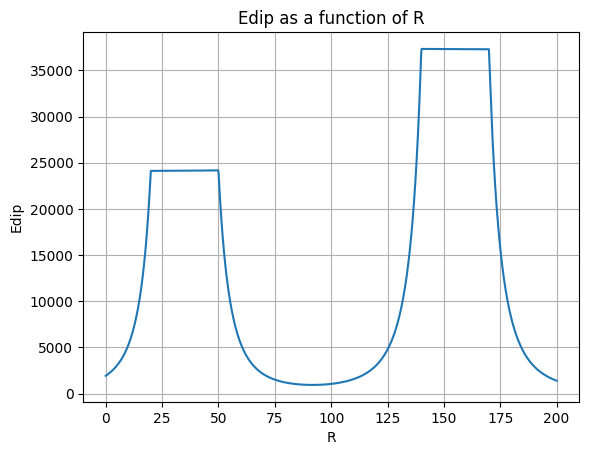

In [81]:
# Compute total response for two spheres separated by distance sep
a=15 #radius sphere, nm
z=5 # height above the surface
sep=8*a #separation between spheres
pos1=20 # center position 1st sphere
npnts=1000
pos2=pos1+sep

# Complex Dielectric constant probe
eps_p = 3.0+0.0j
# Complex Dielectric constant dipole 1
eps_s1 = 10+0j
# Complex Dielectric constant dipole 2
eps_s2 = -10+0j


R_values = np.linspace(0, 200, npnts)
# Compute effective polarizability alpha for each z equal zero (sphere resting on surface)
alpha1_values = alphaeff(eps_p, eps_s1, a, z)
alpha2_values = alphaeff(eps_p, eps_s2, a, z)

Efield1_values = compute_Edip(alpha1_values, R_values, pos1, a)
Efield2_values = compute_Edip(alpha2_values, R_values, pos2, a)

#Uncomment if you want to scale to field at origin of dipole
#Efield1_values/=(np.abs(alph)**2)/(4*np.pi*(np.abs(a/2))**3)
#Efield2_values/=(np.abs(alph)**2)/(4*np.pi*(np.abs(a/2))**3)
#R_values/=a
Efield_values=Efield1_values+Efield2_values

# Plot total field E along sample surface
plot_result(R_values,Efield_values,'R','Edip','Edip as a function of R')

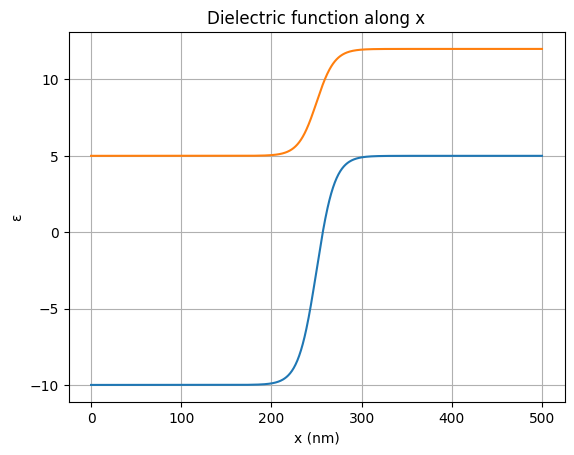

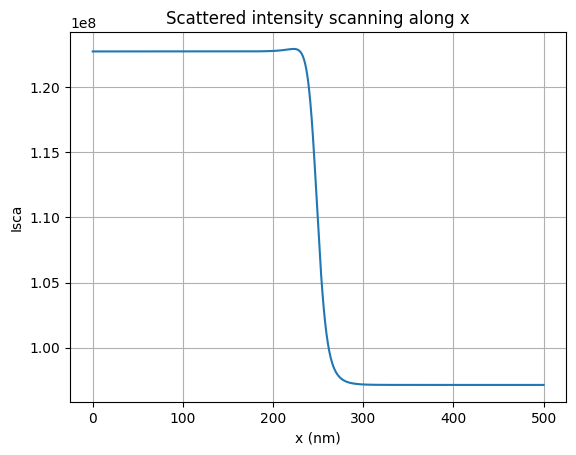

In [66]:
# Compute scattered intensity for spatially inhomogeneous dielectric medium
a=10 #radius sphere, nm
wavelength = 10000  # Wavelength in nanometers (i.e. 10 um)
# Wavenumber k
k = 2 * np.pi / wavelength
z=10 # height above the surface
scan_range=500
npnts=1000

# Complex Dielectric constant probe
eps_p = 3.0+0.0j
# Complex Dielectric constant material 1
eps_s1 = -10+5j
# Complex Dielectric constant material 2
eps_s2 = 5+12j

x_values = np.linspace(0, scan_range, npnts)

eps_values = compute_eps(x_values, eps_s1, eps_s2, a, scan_range/2)

alphaeff_values= alphaeff(eps_p, eps_values, a, z)

# Compute scattered intensity
Isca_values = compute_Isca(alphaeff_values)

# Plot dielectric function along the surface
plt.plot(x_values, np.real(eps_values),x_values, np.imag(eps_values))
plt.xlabel('x (nm)')
plt.ylabel('ε')
plt.title('Dielectric function along x')
plt.grid(True)
plt.show()

# Plot Scattered intensity as function of x along the surface
plt.plot(x_values, Isca_values)
plt.xlabel('x (nm)')
plt.ylabel('Isca')
plt.title('Scattered intensity scanning along x')
plt.grid(True)
plt.show()